In [5]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
file_path = 'data/cinemaTicket_Ref.csv'
data = pd.read_csv(file_path)

In [7]:
data['date'] = pd.to_datetime(data['date'])
time_series = data.groupby('date')['total_sales'].sum().reset_index()
time_series.columns = ['ds', 'y']

In [17]:
print(time_series.head())

          ds           y
0 2018-02-21    32030000
1 2018-02-23      180000
2 2018-03-14  2202300484
3 2018-03-15  4479008974
4 2018-03-16  5386645987


In [19]:
%pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 220.2 kB/s eta 0:01:01
   ---------------------------------------- 0.0/13.3 MB 220.2 kB/s eta 0:01:01
   ---------------------------------------- 0.0/13.3 MB 151.3 kB/s eta 0:01:28
   ---------------------------------------- 0.0/13.3 MB 151.3 kB/s eta 0:01:28
   ---------------------------------------- 0.0/13.3 MB 151.3 kB/s eta 0:01:28
   ---------------------------------------- 0.0/13.3 MB 151.3 kB/s eta 0:01:28
   ---------------------------------------- 0.1/13.3 MB 176.6 kB/s eta 0:01:16
   ---------------------------------------- 0.1/13.3 MB 176.6 kB/s eta 0:01:16
   ---------------------------------------- 0.1/13.3 MB 212.1 kB/s eta 0:01:03
   ---------------------------------------- 0.1/13.3 MB 212.1 kB/s eta 0:01:03


DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from prophet import Prophet
prophet_model = Prophet()
prophet_model.fit(time_series)

future = prophet_model.make_future_dataframe(periods=12, freq='M')

forecast = prophet_model.predict(future)

Importing plotly failed. Interactive plots will not work.
18:06:04 - cmdstanpy - INFO - Chain [1] start processing
18:06:04 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


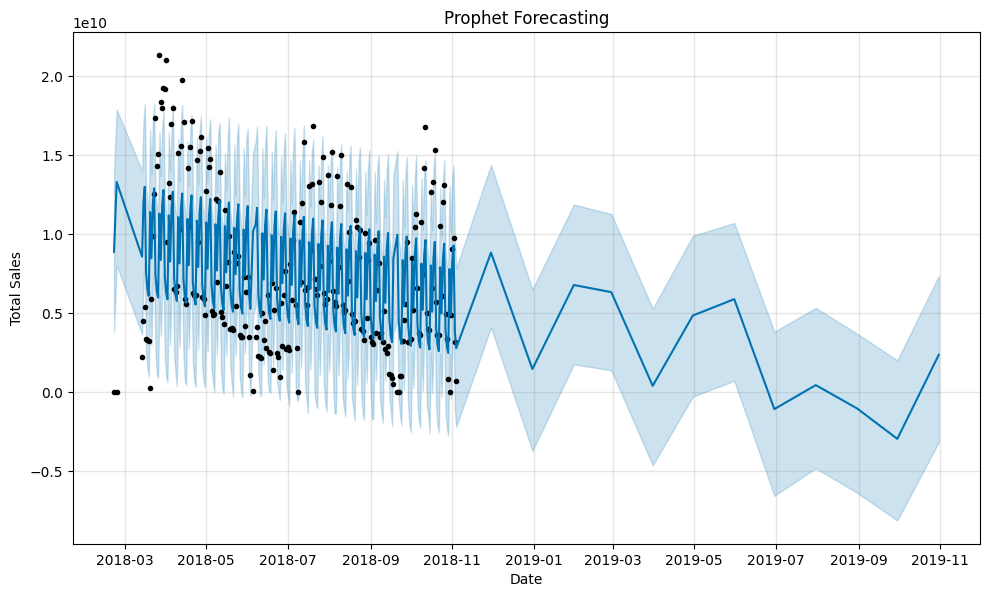

In [21]:
fig = prophet_model.plot(forecast)
plt.title('Prophet Forecasting')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [22]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
234,2018-11-30,8.838162e+09,4.106782e+09,1.438164e+10
235,2018-12-31,1.468752e+09,-3.713761e+09,6.510561e+09
236,2019-01-31,6.788067e+09,1.768067e+09,1.187849e+10
237,2019-02-28,6.334892e+09,1.388733e+09,1.128199e+10
238,2019-03-31,4.065760e+08,-4.622043e+09,5.292177e+09
239,2019-04-30,4.854645e+09,-2.822560e+08,9.898816e+09
240,2019-05-31,5.892520e+09,7.288851e+08,1.071543e+10
241,2019-06-30,-1.066245e+09,-6.556697e+09,3.829942e+09
242,2019-07-31,4.522064e+08,-4.808850e+09,5.341589e+09
243,2019-08-31,-1.031159e+09,-6.372762e+09,3.702116e+09
